# MCscan (Python version) to identify syntenic blocks - binderized

(How is [this--> Multiple Collinearity Scan](http://chibba.agtec.uga.edu/duplication/mcscan/) related to https://github.com/tanghaibao/jcvi/wiki/MCscan-(Python-version) ?)

Everything should be working. No installation necessary. See [here](https://github.com/fomightez/mcscan-binder) about how it works.

-----

This notebook works through [the example workflow][1].

Click on each cell and press `shift-enter` or the run button to run each. Or use alternatives under `Cell` in the menu above this notebook.

You can get to the Jupyter Dashboard by clicking the the Jupyter logo in the upper left corner of this active notebook. There you can see the files in a typical GUI file handling interface. Or simply add a cell at any point and type `ls` to see a listing of the files in the current working directory.

Example Workflow
----------------

[1]: https://github.com/tanghaibao/jcvi/wiki/MCscan-(Python-version)

The [Example Workflow][1] at <https://github.com/tanghaibao/jcvi/wiki/MCscan-(Python-version)> begins with the command `!python2 -m jcvi.apps.fetch phytozome` but the files that fetches have already been put here. So continue with the next commands.  
(Technical reason:  Error when trying that command showed `ftp = FTP(o.netloc)` among the error traceback, and I know MyBinder doesn't allow FTP and so that explains why it won't work here.)

[1]: https://github.com/tanghaibao/jcvi/wiki/MCscan-(Python-version)

In [1]:
!python2 -m jcvi.formats.gff bed --type=mRNA --key=Name Vvinifera_145_gene.gff3.gz -o grape.bed

21:32:55 [base] Load file `Vvinifera_145_gene.gff3.gz`
21:33:09 [gff] Extracted 26346 features (type=mRNA id=Name)


In [2]:
!python2 -m jcvi.formats.gff bed --type=mRNA --key=Name Ppersica_139_gene.gff3.gz -o peach.bed

21:33:11 [base] Load file `Ppersica_139_gene.gff3.gz`
21:33:24 [gff] Extracted 28701 features (type=mRNA id=Name)


'Cleaning' the description lines of the coding sequences (FASTA format) is the next step. This is done to make concise identifiers that match those in the `.bed` file. ( I found matching is important or will get error that identifier not in `.bed` file when trying to run `jcvi.compara.catalog ortholog`.)

To follow what happens in the step, first the next cell will show the first few lines of one of the files before 'cleaning'.

In [3]:
!cp Vvinifera_145_cds.fa.gz Vv_cds.fa.gz
!gunzip Vv_cds.fa.gz
!head Vv_cds.fa

>GSVIVT01000001001|PACid:17816625
ATGGCTTTTGGGCGATTGCGATCGATTCACAATCTGTATCGAACGGCCGAGATTCGACCATTTTCATATCTGCTTGGAAG
CTCTAGAAGCTACTCGATTGTTACAATAAATGTTCCTAAAATTAATTGCTGGGCCACTTCTTACTTCTATAAGGGCCACA
ATGTTCTTCCCTGGACATGTCGAAGCACAATGACACTTCACTCTTCAATGCCTACTGAGCCATGGATCTTGTTGAATGAT
GCAAGGTTGCTAACTACAAGAGCGAAAGCCCCTGCCCAAGTTCGACAAATGGTATCCTATCCTTTCTTTTTGACTGATGG
CAAATATATTGCACTGCCACAAAGCAATTAA
>GSVIVT01000002001|PACid:17816626
ATGGGGTTCTTGGATGCCATACCAAATAAGCATTCACTCCAAGATTCATCCTCCTTTCTCAACACTACTACTGTCATAGC
CCTCTGTTTGTTCTTTGCTCTTCTTTGTGCTTGCATAGTCATTGGCCATCTTCTTGAGGAGCACAGATGGGCCAACGAGT
CAATCACCGCGCTTCTTTTGGGGTTGTGCGCGGGTGTGGTGGTGCTGTTGGTGAGTAAAGGCCGTAGTTCGAAAATTCTT


Now to actually run the 'cleaning' step on the coding sequences.

In [4]:
!python2 -m jcvi.formats.fasta format --sep="|" Vvinifera_145_cds.fa.gz grape.cds
!python2 -m jcvi.formats.fasta format --sep="|" Ppersica_139_cds.fa.gz peach.cds

Let's view the result of the 'cleaning' step.

In [5]:
!head grape.cds

>GSVIVT01000001001
ATGGCTTTTGGGCGATTGCGATCGATTCACAATCTGTATCGAACGGCCGAGATTCGACCA
TTTTCATATCTGCTTGGAAGCTCTAGAAGCTACTCGATTGTTACAATAAATGTTCCTAAA
ATTAATTGCTGGGCCACTTCTTACTTCTATAAGGGCCACAATGTTCTTCCCTGGACATGT
CGAAGCACAATGACACTTCACTCTTCAATGCCTACTGAGCCATGGATCTTGTTGAATGAT
GCAAGGTTGCTAACTACAAGAGCGAAAGCCCCTGCCCAAGTTCGACAAATGGTATCCTAT
CCTTTCTTTTTGACTGATGGCAAATATATTGCACTGCCACAAAGCAATTAA
>GSVIVT01000002001
ATGGGGTTCTTGGATGCCATACCAAATAAGCATTCACTCCAAGATTCATCCTCCTTTCTC
AACACTACTACTGTCATAGCCCTCTGTTTGTTCTTTGCTCTTCTTTGTGCTTGCATAGTC


In [6]:
!python2 -m jcvi.compara.catalog ortholog grape peach

21:33:36 [base] lastdb peach peach.cds
21:33:55 [base] lastal -u 0 -P 16 -i3G -f BlastTab peach grape.cds >grape.peach.last
21:36:51 [synteny] Assuming --qbed=grape.bed --sbed=peach.bed
21:36:51 [base] Load file `grape.bed`
21:36:52 [base] Load file `peach.bed`
21:36:52 [blastfilter] Load BLAST file `grape.peach.last` (total 403868 lines)
21:36:52 [base] Load file `grape.peach.last`
21:36:57 [blastfilter] running the cscore filter (cscore>=0.70) ..
21:36:58 [blastfilter] after filter (294217->31226) ..
21:36:58 [blastfilter] running the local dups filter (tandem_Nmax=10) ..
21:36:58 [blastfilter] after filter (31226->21087) ..
21:36:58 [synteny] Assuming --qbed=grape.bed --sbed=peach.bed
21:36:58 [base] Load file `grape.bed`
21:36:59 [base] Load file `peach.bed`
21:36:59 [base] Load file `grape.peach.last.filtered`
21:36:59 [synteny] A total of 21087 BLAST imported from `grape.peach.last.filtered`.
21:36:59 [synteny] Chaining distance = 20
21:37:00 [base] Load file `grape.peach.anchors

21:37:07 [__init__] loaded modules: ['networkx.drawing.nx_pylab', 'email.MIMEAudio', 'numpy.core.info', 'networkx.algorithms.assortativity.collections', 'jcvi.algorithms.numpy', 'Bio.SeqIO.UniprotIO', 'networkx.generators.trees', 'jcvi.apps.base', 'ctypes.os', 'Bio.os', 'networkx.readwrite.multiline_adjlist', 'runpy', 'gc', 'distutils.sysconfig', 'pkg_resources._vendor.traceback', 'networkx.linalg.laplacianmatrix', 'matplotlib.cbook._backports', 'email.warnings', 'Bio._py3k.urllib2', 'logging.weakref', 'networkx.algorithms.components.strongly_connected', 'jcvi.formats.blast', 'base64', 'networkx.algorithms.community.scipy', 'email.socket', 'scipy.sparse.linalg.isolve.minres', 'networkx.algorithms.tree.coding', 'matplotlib', 'networkx.readwrite.itertools', 'jcvi.utils', 'jcvi.apps.signal', 'unittest.sys', 'jcvi.utils.jcvi', 'numpy.core.umath', 'networkx.generators.degree_seq', 'email.MIMENonMultipart', 'networkx.algorithms.voronoi', 'networkx.algorithms.tree.mst', 'networkx.algorithms.c

21:37:07 [__init__] backend agg version v2.2
21:37:07 [synteny] Assuming --qbed=grape.bed --sbed=peach.bed
21:37:07 [base] Load file `grape.bed`
21:37:08 [base] Load file `peach.bed`
21:37:09 [dotplot] Showing a random subset of 10000 data points (total 14695) for clarity.
21:37:09 [dotplot] xsize=26346 ysize=28701
21:37:09 [texmanager] serif font is not compatible with usetex.
21:37:09 [texmanager] serif font is not compatible with usetex.
21:37:09 [texmanager] family: serif, font: Computer Modern Roman, info: ('cmr', '')
21:37:09 [texmanager] family: sans-serif, font: Helvetica, info: ('phv', '\\usepackage{helvet}')
21:37:09 [texmanager] cursive font is not compatible with usetex.
21:37:09 [texmanager] cursive font is not compatible with usetex.
21:37:09 [texmanager] family: cursive, font: Zapf Chancery, info: ('pzc', '\\usepackage{chancery}')
21:37:09 [texmanager] monospace font is not compatible with usetex.
21:37:09 [texmanager] monospace font is not compatible with usetex.
21:37:

21:37:10 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/tfm/adobe/helvetic/phvr7t.tfm
21:37:10 [dviread] opening tfm file /usr/share/texlive/texmf-dist/fonts/tfm/adobe/helvetic/phvr7t.tfm
21:37:10 [dviread] lh=18, bc=0, ec=170, nw=17, nh=16, nd=16
21:37:10 [dviread] find_tex_file(phvr7t.vf): ['kpsewhich', u'phvr7t.vf']
21:37:10 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/vf/adobe/helvetic/phvr7t.vf
21:37:10 [dviread] Dvi: /usr/share/texlive/texmf-dist/fonts/vf/adobe/helvetic/phvr7t.vf
21:37:10 [dviread] find_tex_file(phvr8r.tfm): ['kpsewhich', u'phvr8r.tfm']
21:37:10 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/tfm/adobe/helvetic/phvr8r.tfm
21:37:10 [dviread] opening tfm file /usr/share/texlive/texmf-dist/fonts/tfm/adobe/helvetic/phvr8r.tfm
21:37:10 [dviread] lh=18, bc=1, ec=255, nw=30, nh=16, nd=16
21:37:10 [dviread] find_tex_file(phvr8r.vf): ['kpsewhich', u'phvr8r.vf']
21:37:10 [dviread] find_tex_file result: 
21:37:

21:37:11 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (49) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
21:37:11 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:37:11 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/7cd776f1b72b9362ca43fd6c0bfca2d6.dvi
21:37:11 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
21:37:11 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
21:37:11 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
21:37:11 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
21:37:11 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/bas

21:37:13 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
21:37:13 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
21:37:13 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (99) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
21:37:13 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
21:37:13 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
21:37:13 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
21:37:13 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The 

21:37:15 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
21:37:15 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
21:37:15 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (104) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
21:37:15 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
21:37:15 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
21:37:15 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
21:37:16 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The

21:37:17 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
21:37:17 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
21:37:18 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (114) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
21:37:18 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
21:37:18 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
21:37:18 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
21:37:18 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The

21:37:20 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
21:37:20 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
21:37:20 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (48) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
21:37:20 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
21:37:20 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
21:37:20 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
21:37:20 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The 

21:37:22 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
21:37:22 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
21:37:22 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (49) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
21:37:22 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:37:22 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/7cd776f1b72b9362ca43fd6c0bfca2d6.dvi
21:37:22 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
21:37:22 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
21:37:22 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/hel

21:37:24 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
21:37:24 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
21:37:24 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (99) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
21:37:24 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
21:37:24 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
21:37:24 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
21:37:24 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The 

21:37:26 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
21:37:26 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
21:37:26 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (104) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
21:37:26 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
21:37:26 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
21:37:26 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
21:37:26 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The

21:37:28 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
21:37:28 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
21:37:29 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (114) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
21:37:29 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
21:37:29 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
21:37:29 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
21:37:29 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The

21:37:31 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
21:37:31 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
21:37:31 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (48) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
21:37:31 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
21:37:31 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
21:37:31 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
21:37:31 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The 

21:37:33 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
21:37:33 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
21:37:33 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (49) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
21:37:33 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:37:33 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/7cd776f1b72b9362ca43fd6c0bfca2d6.dvi
21:37:33 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
21:37:33 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
21:37:33 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/hel

21:37:35 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
21:37:35 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
21:37:35 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (99) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
21:37:35 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
21:37:35 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
21:37:35 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
21:37:35 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The 

21:37:37 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
21:37:37 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
21:37:37 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (104) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
21:37:37 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
21:37:37 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
21:37:37 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
21:37:37 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The

21:37:39 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
21:37:39 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
21:37:39 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (114) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
21:37:39 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
21:37:39 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
21:37:39 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
21:37:39 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The

21:37:41 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
21:37:41 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
21:37:41 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (48) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
21:37:41 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
21:37:41 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
21:37:41 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
21:37:42 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The 

21:37:43 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
21:37:43 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
21:37:44 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (49) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
21:37:44 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:37:44 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/7cd776f1b72b9362ca43fd6c0bfca2d6.dvi
21:37:44 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
21:37:44 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
21:37:44 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/hel

21:37:46 [dotplot] Dot plot title: Inter-genomic comparison: grape vs peach (14,695 gene pairs)
21:37:46 [texmanager] serif font is not compatible with usetex.
21:37:46 [texmanager] serif font is not compatible with usetex.
21:37:46 [texmanager] family: serif, font: Computer Modern Roman, info: ('cmr', '')
21:37:46 [texmanager] family: sans-serif, font: Helvetica, info: ('phv', '\\usepackage{helvet}')
21:37:46 [texmanager] cursive font is not compatible with usetex.
21:37:46 [texmanager] cursive font is not compatible with usetex.
21:37:46 [texmanager] family: cursive, font: Zapf Chancery, info: ('pzc', '\\usepackage{chancery}')
21:37:46 [texmanager] monospace font is not compatible with usetex.
21:37:46 [texmanager] monospace font is not compatible with usetex.
21:37:46 [texmanager] family: monospace, font: Computer Modern Typewriter, info: ('cmtt', '')
21:37:46 [texmanager] following keys changed: ['text.latex.preamble', 'font.family', 'font.serif', 'font.sans-serif', 'font.cursive',

21:37:46 [dviread] find_tex_file result: /var/lib/texmf/fonts/map/pdftex/updmap/pdftex.map
21:37:46 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
21:37:47 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
21:37:47 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
21:37:47 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
21:37:47 [backend_pdf] Assigning font /F1 = phvr8r (dvi)
21:37:47 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:37:47 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/349983685cc735e1492e5b1ebec5dab8.dvi
21:37:47 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
21:37:47 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:37:47 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:37:47 [texmanager] ['latex', '-interaction=no

21:37:47 [texmanager] This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/jovyan/.cache/matplotlib/tex.cache/3317da40e896b541b28c83ecd2421636.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/helvet.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdi

21:37:48 [texmanager] This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/jovyan/.cache/matplotlib/tex.cache/2a24e88ae4c69087b4758430e46e98a6.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/helvet.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdi

21:37:48 [texmanager] This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/jovyan/.cache/matplotlib/tex.cache/9c8f18e3423ef18da82023eef743a329.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/helvet.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdi

21:37:49 [texmanager] This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/jovyan/.cache/matplotlib/tex.cache/01b1a8745c928aef0f0017d5a08660ca.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/helvet.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdi

21:37:49 [texmanager] This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/jovyan/.cache/matplotlib/tex.cache/54271af19a84fbdafe7412238e793353.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/helvet.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdi

21:37:49 [texmanager] This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/jovyan/.cache/matplotlib/tex.cache/325783f52f029ceeeb14bd43fb65f9fb.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/helvet.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdi

21:37:50 [texmanager] This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/jovyan/.cache/matplotlib/tex.cache/25a1a27c994f48454ee02ad96a273fff.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/helvet.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdi

21:37:50 [texmanager] This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/jovyan/.cache/matplotlib/tex.cache/351114413d87206b8f58f9fb6fa4bff8.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/helvet.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdi

21:37:51 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:37:51 [texmanager] ['latex', '-interaction=nonstopmode', '--halt-on-error', '/home/jovyan/.cache/matplotlib/tex.cache/eefceecc2e13cd8f8eb36384e7f0e6e7.tex']
21:37:51 [texmanager] This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/jovyan/.cache/matplotlib/tex.cache/eefceecc2e13cd8f8eb36384e7f0e6e7.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/helvet.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty))
(/usr/share/texlive/texmf-dist/tex/latex/ba

21:37:51 [texmanager] This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/jovyan/.cache/matplotlib/tex.cache/446d220c1f8ece0b686923be5c77740d.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/helvet.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdi

21:37:52 [texmanager] This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/jovyan/.cache/matplotlib/tex.cache/7623af5007db5ba5679ad4c13ed70f54.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/helvet.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdi

21:37:52 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:37:52 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/d2acc2706db635f7f7afe7dc80ac47f1.dvi
21:37:52 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
21:37:52 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:37:52 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:37:52 [texmanager] ['latex', '-interaction=nonstopmode', '--halt-on-error', '/home/jovyan/.cache/matplotlib/tex.cache/11a81aea956f9cf27bd649e250958be4.tex']
21:37:52 [texmanager] This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/jovyan/.cache/matplotlib/tex.cache/11a81aea956f9cf27bd649e250958be4.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/a

21:37:53 [texmanager] This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/jovyan/.cache/matplotlib/tex.cache/4ca40589b15d13576b66f843641d6c54.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/helvet.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdi

21:37:54 [texmanager] This is dvipng 1.15 Copyright 2002-2015 Jan-Ake Larsson
[1] 

21:37:54 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:37:54 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/d840b22b9a7f45cff2ae0fee1099e965.dvi
21:37:54 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
21:37:54 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:37:54 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/d60de6c333e8ed76aa45461974e51bf4.dvi
21:37:54 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
21:37:54 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:37:54 [texmanager] fontconfig: sans-serif

21:37:55 [texmanager] This is dvipng 1.15 Copyright 2002-2015 Jan-Ake Larsson
[1] 

21:37:55 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:37:55 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/b6de5b0458789fb4a3cb6f7eaf429281.dvi
21:37:55 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
21:37:55 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:37:55 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/2a24e88ae4c69087b4758430e46e98a6.dvi
21:37:55 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
21:37:55 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:37:55 [texmanager] fontconfig: sans-serif

21:37:56 [texmanager] This is dvipng 1.15 Copyright 2002-2015 Jan-Ake Larsson
[1] 

21:37:56 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:37:56 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/f932d0fe6cd9b0caff951151521a5c62.dvi
21:37:56 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
21:37:56 [font_manager] findfont: Matching :family=DejaVu Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=5.0 to DejaVu Sans (u'/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
21:37:56 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:37:56 [dviread] Dvi: /home/jovyan/.cache/matplotlib

21:37:56 [texmanager] This is dvipng 1.15 Copyright 2002-2015 Jan-Ake Larsson
[1] 

21:37:56 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:37:56 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/9369fa58e3293cf82190941da3505ccc.dvi
21:37:56 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
21:37:56 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:37:56 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/325783f52f029ceeeb14bd43fb65f9fb.dvi
21:37:56 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
21:37:56 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:37:56 [texmanager] fontconfig: sans-serif

21:37:57 [texmanager] This is dvipng 1.15 Copyright 2002-2015 Jan-Ake Larsson
[1] 

21:37:57 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:37:57 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/865a1ba134c9cbbd364e43641fd37fe2.dvi
21:37:57 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
21:37:57 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:37:57 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/da424f824d7f8700124c08ce01d392b4.dvi
21:37:57 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
21:37:57 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:37:57 [texmanager] fontconfig: sans-serif

/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
21:37:58 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:37:58 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/12ad8c5c03e3b2f9e160089bd2fc733f.dvi
21:37:58 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
21:37:58 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:37:58 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:37:58 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:37:58 [texmanager] ['dvipng', '-bg', 'Transparent', '-D', '100.0', '-T', 'tight', '-o', '/home/jovyan/.cache/matplotlib/tex.cache/d686f3347c58e648945acc9d31126625.png', '/home/jovyan/.cache/matplotlib/tex.cache/12ad8c5c03e3

/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
21:37:58 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:37:58 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/38bd6b3111ec14e1e7f734848ecb7888.dvi
21:37:58 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
21:37:58 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:37:58 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/11a81aea956f9cf27bd649e250958be4.dvi
21:37:58 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.

21:37:59 [texmanager] This is dvipng 1.15 Copyright 2002-2015 Jan-Ake Larsson
[1] 

21:37:59 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:37:59 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/2f047c73b1c0d8aced946a58e52db386.dvi
21:37:59 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
21:37:59 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:37:59 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/d6a663b311492c9adbdc3189a77bead7.dvi
21:37:59 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif']

21:37:59 [base] Figure saved to `grape.peach.pdf` (720px x 720px)


In [7]:
!python2 -m jcvi.compara.synteny depth --histogram grape.peach.anchors

21:38:01 [synteny] Assuming --qbed=grape.bed --sbed=peach.bed
21:38:01 [base] Load file `grape.bed`
21:38:02 [base] Load file `peach.bed`
21:38:02 [base] Load file `grape.peach.anchors`
Genome grape depths:
Depth 0: 4,047 of 26,346 (15.4%)
Depth 1: 14,141 of 26,346 (53.7%)
Depth 2: 6,134 of 26,346 (23.3%)
Depth 3: 1,996 of 26,346 (7.6%)
Depth 4: 28 of 26,346 (0.1%)
Genome peach depths:
Depth 0: 3,347 of 28,701 (11.7%)
Depth 1: 16,459 of 28,701 (57.3%)
Depth 2: 7,065 of 28,701 (24.6%)
Depth 3: 1,830 of 28,701 (6.4%)
Depth 4: 0 of 28,701 (0.0%)
21:38:02 [__init__] $HOME=/home/jovyan
21:38:02 [__init__] matplotlib data path /srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/mpl-data
21:38:02 [__init__] loaded rc file /srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/mpl-data/matplotlibrc
21:38:02 [__init__] matplotlib version 2.2.2
21:38:02 [__init__] interactive is False
21:38:02 [__init__] platform is linux2
21:38:02 [__init__] loaded modules: ['networkx.drawing.n

21:38:02 [__init__] CACHEDIR=/home/jovyan/.cache/matplotlib
21:38:02 [font_manager] Using fontManager instance from /home/jovyan/.cache/matplotlib/fontList.json
21:38:03 [__init__] backend agg version v2.2
grape vs peach syntenic depths
2:2 pattern
21:38:03 [texmanager] serif font is not compatible with usetex.
21:38:03 [texmanager] serif font is not compatible with usetex.
21:38:03 [texmanager] family: serif, font: Computer Modern Roman, info: ('cmr', '')
21:38:03 [texmanager] family: sans-serif, font: Helvetica, info: ('phv', '\\usepackage{helvet}')
21:38:03 [texmanager] cursive font is not compatible with usetex.
21:38:03 [texmanager] cursive font is not compatible with usetex.
21:38:03 [texmanager] family: cursive, font: Zapf Chancery, info: ('pzc', '\\usepackage{chancery}')
21:38:03 [texmanager] monospace font is not compatible with usetex.
21:38:03 [texmanager] monospace font is not compatible with usetex.
21:38:03 [texmanager] family: monospace, font: Computer Modern Typewriter,

21:38:04 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/tfm/public/cm/cmr10.tfm
21:38:04 [dviread] opening tfm file /usr/share/texlive/texmf-dist/fonts/tfm/public/cm/cmr10.tfm
21:38:04 [dviread] lh=18, bc=0, ec=127, nw=36, nh=16, nd=10
21:38:04 [dviread] find_tex_file(cmr10.vf): ['kpsewhich', u'cmr10.vf']
21:38:04 [dviread] find_tex_file result: 
21:38:04 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:38:04 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/d2acc2706db635f7f7afe7dc80ac47f1.dvi
21:38:04 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
21:38:04 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:38:04 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:38:04 [texmanager] ['latex', '-interaction=nonstopmode', '--halt-on-error', '/home/jovyan/.cache/matplotlib/tex.cache/87adbbefb589e0bc037a47eef073a2ef.tex']
21:38:04 [te

21:38:05 [texmanager] This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/jovyan/.cache/matplotlib/tex.cache/0567c676ca47e285814ded49202d47e9.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/helvet.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdi

21:38:06 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
21:38:06 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
21:38:06 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
21:38:06 [backend_pdf] Assigning font /F2 = phvr8r (dvi)
21:38:06 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:38:06 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/d2acc2706db635f7f7afe7dc80ac47f1.dvi
21:38:06 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
21:38:06 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:38:06 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/bfaa0a3437a5882c4da650094894b182.dvi
21:38:06 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
21:38:06 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:38:06 [dviread] Dvi: /

21:38:06 [texmanager] This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/jovyan/.cache/matplotlib/tex.cache/ca0f0f37bfafa4a62b58a70764190b68.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/helvet.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdi

21:38:07 [texmanager] This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/jovyan/.cache/matplotlib/tex.cache/22da34438677174d5367592d516b5377.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/helvet.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdi

21:38:07 [texmanager] This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/jovyan/.cache/matplotlib/tex.cache/fff23fb92ebd4b41d0a46c4279a5acd5.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/helvet.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdi

21:38:08 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:38:08 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/22da34438677174d5367592d516b5377.dvi
21:38:08 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
21:38:08 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:38:08 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:38:08 [texmanager] ['latex', '-interaction=nonstopmode', '--halt-on-error', '/home/jovyan/.cache/matplotlib/tex.cache/94790cbadf0ebd4c3b69ac75f6fbd8fe.tex']
21:38:08 [texmanager] This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/jovyan/.cache/matplotlib/tex.cache/94790cbadf0ebd4c3b69ac75f6fbd8fe.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/a

21:38:08 [texmanager] This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/jovyan/.cache/matplotlib/tex.cache/7b444e1faa51eac8742dd249a28a0e77.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/helvet.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdi

21:38:09 [backend_pdf] Embedding Type-1 font cmr8 from dvi.
21:38:09 [backend_pdf] Embedding TeX font cmr8 - fontinfo={'fontfile': u'/usr/share/texlive/texmf-dist/fonts/type1/public/amsfonts/cm/cmr8.pfb', 'pdfname': <Name F3>, 'encodingfile': None, 'dvifont': <matplotlib.dviread.DviFont object at 0x7f93fb53ed10>, 'basefont': 'CMR8', 'effects': {}}
21:38:09 [backend_pdf] Embedding Type-1 font phvr8r from dvi.
21:38:09 [backend_pdf] Embedding TeX font phvr8r - fontinfo={'fontfile': u'/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb', 'pdfname': <Name F2>, 'encodingfile': u'/usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc', 'dvifont': <matplotlib.dviread.DviFont object at 0x7f93fb53ead0>, 'basefont': 'NimbusSanL-Regu', 'effects': {}}
21:38:09 [dviread] Parsing TeX encoding /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
21:38:09 [dviread] Result: ['.notdef', 'dotaccent', 'fi', 'fl/fraction', 'hungarumlaut', 'Lslash', 'lslash/ogonek', 'ring', '.notdef', 

21:38:09 [texmanager] This is dvipng 1.15 Copyright 2002-2015 Jan-Ake Larsson
[1] 

21:38:09 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:38:09 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/bfaa0a3437a5882c4da650094894b182.dvi
21:38:09 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
21:38:09 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:38:09 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:38:09 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:38:09 [texmanager] ['dvipng', '-bg', 'Transparent', '-D', '100.0', '-T', 'tight', '-o', '/home/jovyan/.cache/matplotlib/tex.cache/28c691a63342643ce52b3d06bce03361.png', '/home/jovyan/.cache/matplotlib/tex.cache/87adbbefb589e0bc037a47eef073a2ef.dvi']
21:38:09 [texmanager] This is dvipng 1.15 Copyright 2002-2015 Jan-Ake Larsson
[1] 

21:38:09 [texmanager] fontconfi

21:38:10 [texmanager] This is dvipng 1.15 Copyright 2002-2015 Jan-Ake Larsson
[1] 

21:38:10 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:38:10 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/cfc378e35f19cc7b154a2ffe1658c471.dvi
21:38:10 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
21:38:10 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:38:10 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:38:10 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:38:10 [texmanager] ['dvipng', '-bg', 'Transparent', '-D', '100.0', '-T', 'tight', '-o', '/home/jovyan/.cache/matplotlib/tex.cache/6f2bb368f2b5a2bc7ae0b828ac691da9.png', '/home/jovyan/.cache/matplotlib/tex.cache/874ac87f674a773a3e75760c741f863a.dvi']
21:38:10 [texmanager] This is dvipng 1.15 Copyright 2002-2015 Jan-Ake Larsson
[1] 

21:38:10 [texmanager] fontconfi

/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
21:38:10 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:38:10 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/7211f940a9cdce244777a75169475491.dvi
21:38:10 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
21:38:10 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:38:10 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:38:10 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:38:10 [texmanager] ['dvipng', '-bg', 'Transparent', '-D', '100.0', '-T', 'tight', '-o', '/home/jovyan/.cache/matplotlib/tex.cache/69d426fa2bd40e7c50c6e697d3ba6cd1.png', '/home/jovyan/.cache/matplotlib/tex.cache/7211f940a9cd

21:38:11 [texmanager] This is dvipng 1.15 Copyright 2002-2015 Jan-Ake Larsson
[1] 

21:38:11 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:38:11 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/8020ab2c4cd42e10b9fcfe0c82330d73.dvi
21:38:11 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
21:38:11 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:38:11 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/94790cbadf0ebd4c3b69ac75f6fbd8fe.dvi
21:38:11 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
21:38:11 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:38:11 [texmanager] fontconfig: sans-serif

21:38:12 [texmanager] This is dvipng 1.15 Copyright 2002-2015 Jan-Ake Larsson
[1] 

21:38:12 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:38:12 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/eb36ea906494e01f114f3d7aae747b69.dvi
21:38:12 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
21:38:12 [font_manager] findfont: Matching :family=DejaVu Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=16.0 to DejaVu Sans (u'/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
21:38:12 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:38:12 [dviread] Dvi: /home/jovyan/.cache/matplotli

Let's rename and display couple of the files so we can see the differences they refer to in the example workflow when we just try with the othologs below.

In [8]:
# rename `grape.peach.pdf` and `grape.peach.depth.pdf`
!mv grape.peach.pdf grape.peachDEFAULT.pdf
!mv grape.peach.depth.pdf grape.peach.depthDEFAULT.pdf

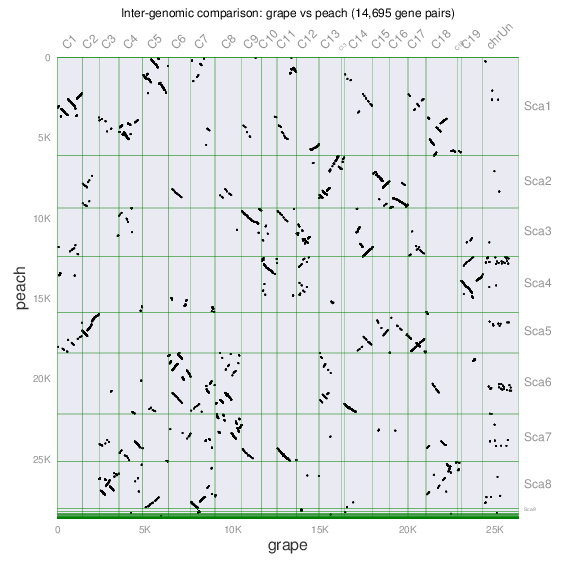

In [9]:
# display `grape.peachDEFAULT.pdf`
from wand.image import Image as WImage
img = WImage(filename="grape.peachDEFAULT.pdf")
img

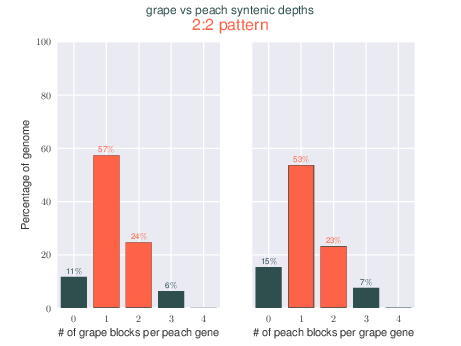

In [10]:
# display `grape.peach.depthDEFAULT.pdf`
from wand.image import Image as WImage
img = WImage(filename="grape.peach.depthDEFAULT.pdf")
img

### Run with setting to collect orthologs

Delete old version of data and re-run with `--cscore=.99` option as discussed in the workflow example.

In [11]:
# remove default run
!rm grape.peach.last.filtered 
# Run to identify orthologs
!python2 -m jcvi.compara.catalog ortholog grape peach --cscore=.99
!python2 -m jcvi.graphics.dotplot grape.peach.anchors

21:38:20 [synteny] Assuming --qbed=grape.bed --sbed=peach.bed
21:38:20 [base] Load file `grape.bed`
21:38:21 [base] Load file `peach.bed`
21:38:21 [blastfilter] Load BLAST file `grape.peach.last` (total 403868 lines)
21:38:21 [base] Load file `grape.peach.last`
21:38:25 [blastfilter] running the cscore filter (cscore>=0.99) ..
21:38:26 [blastfilter] after filter (294217->14417) ..
21:38:26 [blastfilter] running the local dups filter (tandem_Nmax=10) ..
21:38:26 [blastfilter] after filter (14417->13886) ..
21:38:27 [synteny] Assuming --qbed=grape.bed --sbed=peach.bed
21:38:27 [base] Load file `grape.bed`
21:38:27 [base] Load file `peach.bed`
21:38:27 [base] Load file `grape.peach.last.filtered`
21:38:28 [synteny] A total of 13886 BLAST imported from `grape.peach.last.filtered`.
21:38:28 [synteny] Chaining distance = 20
21:38:28 [base] Load file `grape.peach.anchors`
A total of 11511 (NR:11497) anchors found in 369 clusters.
Stats: Min=4 Max=357 N=369 Mean=31.1951219512 SD=44.5398622113 

21:38:34 [__init__] CACHEDIR=/home/jovyan/.cache/matplotlib
21:38:34 [font_manager] Using fontManager instance from /home/jovyan/.cache/matplotlib/fontList.json
21:38:34 [__init__] backend agg version v2.2
21:38:35 [synteny] Assuming --qbed=grape.bed --sbed=peach.bed
21:38:35 [base] Load file `grape.bed`
21:38:35 [base] Load file `peach.bed`
21:38:36 [dotplot] Showing a random subset of 10000 data points (total 11511) for clarity.
21:38:36 [dotplot] xsize=26346 ysize=28701
21:38:36 [texmanager] serif font is not compatible with usetex.
21:38:36 [texmanager] serif font is not compatible with usetex.
21:38:36 [texmanager] family: serif, font: Computer Modern Roman, info: ('cmr', '')
21:38:36 [texmanager] family: sans-serif, font: Helvetica, info: ('phv', '\\usepackage{helvet}')
21:38:36 [texmanager] cursive font is not compatible with usetex.
21:38:36 [texmanager] cursive font is not compatible with usetex.
21:38:36 [texmanager] family: cursive, font: Zapf Chancery, info: ('pzc', '\\usep

21:38:37 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
21:38:37 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
21:38:38 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
21:38:38 [dviread] Parsing TeX encoding /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
21:38:38 [dviread] Result: ['.notdef', 'dotaccent', 'fi', 'fl/fraction', 'hungarumlaut', 'Lslash', 'lslash/ogonek', 'ring', '.notdef', 'breve/minus', '.notdef', 'Zcaron', 'zcaron/caron', 'dotlessi', 'dotlessj', 'ff/ffi', 'ffl', 'notequal', 'infinity/lessequal', 'greaterequal', 'partialdiff', 'summation/product', 'pi', 'grave', 'quotesingle/space', 'exclam', 'quotedbl', 'numbersign/dollar', 'percent', 'ampersand', 'quoteright/parenleft', 'parenright', 'asterisk', 'plus/comma', 'hyphen', 'period', 'slash/zero', 'one', 'two', 'three/four', 'five', 'six', 'seven/eight', 'nine', 'colon', 'semicolon/less', 'equal', 'greater', 'q

21:38:39 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
21:38:39 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
21:38:39 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (48) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
21:38:39 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
21:38:39 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
21:38:39 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
21:38:39 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The 

/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (48) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
21:38:41 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
21:38:41 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
21:38:41 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
21:38:41 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (49) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
21:38:41 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998e

21:38:43 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
21:38:43 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
21:38:43 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (49) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
21:38:43 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:38:43 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/7cd776f1b72b9362ca43fd6c0bfca2d6.dvi
21:38:43 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
21:38:43 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
21:38:43 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/hel

21:38:45 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
21:38:45 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
21:38:46 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (99) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
21:38:46 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
21:38:46 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
21:38:46 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
21:38:46 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The 

21:38:48 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
21:38:48 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
21:38:48 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (104) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
21:38:48 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
21:38:48 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
21:38:48 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
21:38:48 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The

21:38:50 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
21:38:50 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
21:38:50 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (114) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
21:38:50 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
21:38:50 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
21:38:50 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
21:38:50 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The

21:38:52 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
21:38:52 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
21:38:52 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (48) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
21:38:52 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
21:38:53 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
21:38:53 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
21:38:53 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The 

21:38:55 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
21:38:55 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
21:38:55 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (49) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
21:38:55 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:38:55 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/7cd776f1b72b9362ca43fd6c0bfca2d6.dvi
21:38:55 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
21:38:55 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
21:38:55 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/hel

21:38:57 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
21:38:57 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
21:38:57 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (99) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
21:38:57 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
21:38:57 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
21:38:57 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
21:38:57 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The 

21:38:59 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
21:38:59 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
21:38:59 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (104) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
21:38:59 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
21:39:00 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
21:39:00 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
21:39:00 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The

21:39:02 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
21:39:02 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
21:39:02 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (114) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
21:39:02 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
21:39:02 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
21:39:02 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
21:39:02 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The

21:39:04 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
21:39:04 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
21:39:04 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (48) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
21:39:04 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
21:39:04 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
21:39:04 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
21:39:04 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The 

21:39:06 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
21:39:06 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
21:39:06 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (49) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
21:39:06 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:39:06 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/7cd776f1b72b9362ca43fd6c0bfca2d6.dvi
21:39:06 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
21:39:06 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
21:39:06 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/hel

21:39:09 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
21:39:09 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
21:39:09 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (99) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
21:39:09 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
21:39:09 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
21:39:09 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
21:39:09 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The 

21:39:11 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
21:39:11 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
21:39:11 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (104) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
21:39:11 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
21:39:11 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
21:39:11 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
21:39:11 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The

21:39:13 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
21:39:13 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
21:39:13 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (114) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
21:39:13 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
21:39:14 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
21:39:14 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
21:39:14 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The

21:39:15 [dviread] find_tex_file result: /var/lib/texmf/fonts/map/pdftex/updmap/pdftex.map
21:39:16 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
21:39:16 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
21:39:16 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
21:39:16 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
21:39:16 [backend_pdf] Assigning font /F1 = phvr8r (dvi)
21:39:16 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:39:16 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/349983685cc735e1492e5b1ebec5dab8.dvi
21:39:16 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
21:39:16 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:39:16 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/d60de6c333e8ed76aa45461974e51bf4.dvi
21:39:16 [dviread] Dvi._xxx: encount

21:39:16 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/349983685cc735e1492e5b1ebec5dab8.dvi
21:39:16 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
21:39:16 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:39:16 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/25a1a27c994f48454ee02ad96a273fff.dvi
21:39:16 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
21:39:16 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:39:16 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/25a1a27c994f48454ee02ad96a273fff.dvi
21:39:16 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
21:39:16 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:39:16 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/349983685cc735e1492e5b1ebec5dab8.dvi
21:39:16 [dviread] Dvi._xxx: encountered special: papersize=5203

21:39:16 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:39:16 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/446d220c1f8ece0b686923be5c77740d.dvi
21:39:16 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
21:39:16 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:39:16 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/349983685cc735e1492e5b1ebec5dab8.dvi
21:39:16 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
21:39:16 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:39:16 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:39:16 [texmanager] ['latex', '-interaction=nonstopmode', '--halt-on-error', '/home/jovyan/.cache/matplotlib/tex.cache/24b784b8839d6084e4f6e46a4a1251de.tex']
21:39:16 [texmanager] This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded f

21:39:16 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/d0b209618f8b4e9373c4de3685ab2cd6.dvi
21:39:16 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
21:39:16 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:39:16 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/b58b8e57b80fbcf07c4d31990bec772c.dvi
21:39:16 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
21:39:16 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:39:16 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/38bd6b3111ec14e1e7f734848ecb7888.dvi
21:39:16 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
21:39:16 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:39:16 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/11a81aea956f9cf27bd649e250958be4.dvi
21:39:16 [dviread] Dvi._xxx: encountered special: papersize=5203

21:39:17 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:39:17 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/f7ee620ae4655b3c0e3508a2ba0251b1.dvi
21:39:17 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
21:39:17 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:39:17 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/4ca40589b15d13576b66f843641d6c54.dvi
21:39:17 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
21:39:17 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:39:17 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/4ca40589b15d13576b66f843641d6c54.dvi
21:39:17 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
21:39:17 [backend_pdf] Embedding Type-1 font phvr8r from dvi.
21:39:17 [backend_pdf] Embedding TeX font phvr8r - fontinfo={'fontfile': u'/usr/share/texlive/texmf-dist

/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
21:39:17 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:39:17 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/3317da40e896b541b28c83ecd2421636.dvi
21:39:17 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
21:39:17 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:39:17 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:39:17 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:39:17 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/3317da40e896b541b28c83ecd2421636.dvi
21:39:17 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/s

21:39:18 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
21:39:18 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:39:18 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:39:18 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:39:18 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/a42248172727c2331616ee4cab4d7741.dvi
21:39:18 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
21:39:18 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:39:18 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/f932d0fe6cd9b0caff951151521a5c62.dvi
21:39:18 [dviread] Dvi._xxx: encounter

21:39:18 [font_manager] findfont: Matching :family=DejaVu Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=6.0 to DejaVu Sans (u'/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
21:39:18 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:39:18 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/6776d592fe408de593e561fb9fca0f38.dvi
21:39:18 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
21:39:18 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:39:18 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:39:18 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:39:18 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/6776d592fe408de593e561fb9fca0f38.dvi
21:39:18 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.4399

/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
21:39:18 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:39:18 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/446d220c1f8ece0b686923be5c77740d.dvi
21:39:18 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
21:39:18 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:39:18 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:39:18 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:39:18 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/446d220c1f8ece0b686923be5c77740d.dvi
21:39:18 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/s

/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
21:39:18 [font_manager] findfont: Matching :family=DejaVu Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=16.0 to DejaVu Sans (u'/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
21:39:18 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:39:18 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/2f047c73b1c0d8aced946a58e52db386.dvi
21:39:18 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
21:39:18 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:39:18 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:39:18 [texmanager] fontconfig: sans-serifcmr

21:39:19 [base] Figure saved to `grape.peach.pdf` (720px x 720px)
21:39:21 [__init__] $HOME=/home/jovyan
21:39:21 [__init__] matplotlib data path /srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/mpl-data
21:39:21 [__init__] loaded rc file /srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/mpl-data/matplotlibrc
21:39:21 [__init__] matplotlib version 2.2.2
21:39:21 [__init__] interactive is False
21:39:21 [__init__] platform is linux2
21:39:21 [__init__] loaded modules: ['networkx.drawing.nx_pylab', 'email.MIMEAudio', 'numpy.core.info', 'networkx.algorithms.assortativity.collections', 'Bio.SeqIO.UniprotIO', 'networkx.generators.trees', 'jcvi.apps.base', 'ctypes.os', 'Bio.os', 'networkx.readwrite.multiline_adjlist', 'runpy', 'gc', 'distutils.sysconfig', 'pkg_resources._vendor.traceback', 'networkx.linalg.laplacianmatrix', 'matplotlib.cbook._backports', 'email.warnings', 'Bio._py3k.urllib2', 'logging.weakref', 'networkx.algorithms.components.strongly_connected', 'jc

21:39:21 [__init__] CACHEDIR=/home/jovyan/.cache/matplotlib
21:39:21 [font_manager] Using fontManager instance from /home/jovyan/.cache/matplotlib/fontList.json
21:39:21 [__init__] backend agg version v2.2
21:39:21 [synteny] Assuming --qbed=grape.bed --sbed=peach.bed
21:39:21 [base] Load file `grape.bed`
21:39:22 [base] Load file `peach.bed`
21:39:23 [dotplot] Showing a random subset of 10000 data points (total 11511) for clarity.
21:39:23 [dotplot] xsize=26346 ysize=28701
21:39:23 [texmanager] serif font is not compatible with usetex.
21:39:23 [texmanager] serif font is not compatible with usetex.
21:39:23 [texmanager] family: serif, font: Computer Modern Roman, info: ('cmr', '')
21:39:23 [texmanager] family: sans-serif, font: Helvetica, info: ('phv', '\\usepackage{helvet}')
21:39:23 [texmanager] cursive font is not compatible with usetex.
21:39:23 [texmanager] cursive font is not compatible with usetex.
21:39:23 [texmanager] family: cursive, font: Zapf Chancery, info: ('pzc', '\\usep

21:39:24 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
21:39:24 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
21:39:24 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
21:39:24 [dviread] Parsing TeX encoding /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
21:39:24 [dviread] Result: ['.notdef', 'dotaccent', 'fi', 'fl/fraction', 'hungarumlaut', 'Lslash', 'lslash/ogonek', 'ring', '.notdef', 'breve/minus', '.notdef', 'Zcaron', 'zcaron/caron', 'dotlessi', 'dotlessj', 'ff/ffi', 'ffl', 'notequal', 'infinity/lessequal', 'greaterequal', 'partialdiff', 'summation/product', 'pi', 'grave', 'quotesingle/space', 'exclam', 'quotedbl', 'numbersign/dollar', 'percent', 'ampersand', 'quoteright/parenleft', 'parenright', 'asterisk', 'plus/comma', 'hyphen', 'period', 'slash/zero', 'one', 'two', 'three/four', 'five', 'six', 'seven/eight', 'nine', 'colon', 'semicolon/less', 'equal', 'greater', 'q

21:39:25 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
21:39:25 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
21:39:25 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (48) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
21:39:25 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
21:39:26 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
21:39:26 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
21:39:26 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The 

21:39:28 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
21:39:28 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
21:39:28 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (49) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
21:39:28 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:39:28 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/7cd776f1b72b9362ca43fd6c0bfca2d6.dvi
21:39:28 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
21:39:28 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
21:39:28 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/hel

21:39:30 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
21:39:30 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
21:39:30 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (99) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
21:39:30 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
21:39:30 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
21:39:30 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
21:39:30 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The 

21:39:32 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
21:39:32 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
21:39:32 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (104) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
21:39:32 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
21:39:32 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
21:39:32 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
21:39:32 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The

21:39:34 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
21:39:34 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
21:39:34 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (114) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
21:39:34 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
21:39:34 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
21:39:34 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
21:39:34 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The

21:39:36 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
21:39:36 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
21:39:36 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (48) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
21:39:36 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
21:39:36 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
21:39:36 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
21:39:37 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The 

21:39:39 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
21:39:39 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
21:39:39 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (49) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
21:39:39 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:39:39 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/7cd776f1b72b9362ca43fd6c0bfca2d6.dvi
21:39:39 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
21:39:39 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
21:39:39 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/hel

/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (49) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
21:39:41 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:39:41 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/7cd776f1b72b9362ca43fd6c0bfca2d6.dvi
21:39:41 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
21:39:41 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
21:39:41 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
21:39:41 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
21:39:41 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning

21:39:43 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
21:39:43 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
21:39:43 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (99) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
21:39:43 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
21:39:43 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
21:39:43 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
21:39:43 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The 

21:39:45 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
21:39:45 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
21:39:45 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (104) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
21:39:45 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
21:39:45 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
21:39:45 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
21:39:45 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The

21:39:47 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
21:39:47 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
21:39:47 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (114) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
21:39:47 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
21:39:47 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
21:39:47 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
21:39:47 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The

21:39:49 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
21:39:49 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
21:39:49 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (48) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
21:39:49 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
21:39:50 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
21:39:50 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
21:39:50 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The 

21:39:52 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
21:39:52 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
21:39:52 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (49) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
21:39:52 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:39:52 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/7cd776f1b72b9362ca43fd6c0bfca2d6.dvi
21:39:52 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
21:39:52 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
21:39:52 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/hel

21:39:54 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
21:39:54 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
21:39:54 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (99) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
21:39:54 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
21:39:54 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
21:39:54 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
21:39:54 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The 

21:39:56 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
21:39:56 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
21:39:56 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (104) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
21:39:56 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
21:39:56 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
21:39:56 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
21:39:56 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The

21:39:58 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
21:39:58 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
21:39:58 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (114) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
21:39:58 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
21:39:58 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
21:39:58 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
21:39:59 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The

21:40:00 [dviread] find_tex_file result: /var/lib/texmf/fonts/map/pdftex/updmap/pdftex.map
21:40:00 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
21:40:01 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
21:40:01 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
21:40:01 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
21:40:01 [backend_pdf] Assigning font /F1 = phvr8r (dvi)
21:40:01 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:40:01 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/349983685cc735e1492e5b1ebec5dab8.dvi
21:40:01 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
21:40:01 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:40:01 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/d60de6c333e8ed76aa45461974e51bf4.dvi
21:40:01 [dviread] Dvi._xxx: encount

21:40:01 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
21:40:01 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:40:01 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/349983685cc735e1492e5b1ebec5dab8.dvi
21:40:01 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
21:40:01 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:40:01 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/c0a03e6224343512cb1d881ae2e63f7e.dvi
21:40:01 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
21:40:01 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:40:01 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/c0a03e6224343512cb1d881ae2e63f7e.dvi
21:40:01 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
21:40:01 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e980099

21:40:01 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:40:01 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/d2acc2706db635f7f7afe7dc80ac47f1.dvi
21:40:01 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
21:40:01 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:40:01 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/d6a663b311492c9adbdc3189a77bead7.dvi
21:40:01 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
21:40:01 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:40:01 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/d2acc2706db635f7f7afe7dc80ac47f1.dvi
21:40:01 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
21:40:01 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:40:01 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/7623af5007d

21:40:02 [backend_pdf] Embedding Type-1 font phvr8r from dvi.
21:40:02 [backend_pdf] Embedding TeX font phvr8r - fontinfo={'fontfile': u'/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb', 'pdfname': <Name F1>, 'encodingfile': u'/usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc', 'dvifont': <matplotlib.dviread.DviFont object at 0x7f42d781f4d0>, 'basefont': 'NimbusSanL-Regu', 'effects': {}}
21:40:02 [dviread] Parsing TeX encoding /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
21:40:02 [dviread] Result: ['.notdef', 'dotaccent', 'fi', 'fl/fraction', 'hungarumlaut', 'Lslash', 'lslash/ogonek', 'ring', '.notdef', 'breve/minus', '.notdef', 'Zcaron', 'zcaron/caron', 'dotlessi', 'dotlessj', 'ff/ffi', 'ffl', 'notequal', 'infinity/lessequal', 'greaterequal', 'partialdiff', 'summation/product', 'pi', 'grave', 'quotesingle/space', 'exclam', 'quotedbl', 'numbersign/dollar', 'percent', 'ampersand', 'quoteright/parenleft', 'parenright', 'asterisk', 'plus/comma', 'hyp

/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
21:40:02 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:40:02 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/3317da40e896b541b28c83ecd2421636.dvi
21:40:02 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
21:40:02 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:40:02 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:40:02 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:40:02 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/3317da40e896b541b28c83ecd2421636.dvi
21:40:02 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/s

/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
21:40:02 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:40:02 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/54271af19a84fbdafe7412238e793353.dvi
21:40:02 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
21:40:02 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:40:02 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:40:02 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:40:02 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/54271af19a84fbdafe7412238e793353.dvi
21:40:02 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/s

/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
21:40:02 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:40:02 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/351114413d87206b8f58f9fb6fa4bff8.dvi
21:40:02 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
21:40:02 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:40:02 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:40:02 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:40:02 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/351114413d87206b8f58f9fb6fa4bff8.dvi
21:40:02 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/s

21:40:02 [font_manager] findfont: Matching :family=DejaVu Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans (u'/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
21:40:02 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:40:02 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/d6a663b311492c9adbdc3189a77bead7.dvi
21:40:02 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
21:40:02 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:40:02 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/7623af5007db5ba5679ad4c13ed70f54.dvi
21:40:02 [dviread] Dvi._xxx: encoun

/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
21:40:03 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:40:03 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/d0b209618f8b4e9373c4de3685ab2cd6.dvi
21:40:03 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
21:40:03 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:40:03 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/b58b8e57b80fbcf07c4d31990bec772c.dvi
21:40:03 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.

In [12]:
# run depth script with ortholog result
!python2 -m jcvi.compara.synteny depth --histogram grape.peach.anchors

21:40:05 [synteny] Assuming --qbed=grape.bed --sbed=peach.bed
21:40:05 [base] Load file `grape.bed`
21:40:05 [base] Load file `peach.bed`
21:40:06 [base] Load file `grape.peach.anchors`
Genome grape depths:
Depth 0: 4,891 of 26,346 (18.6%)
Depth 1: 21,225 of 26,346 (80.6%)
Depth 2: 230 of 26,346 (0.9%)
Genome peach depths:
Depth 0: 4,535 of 28,701 (15.8%)
Depth 1: 23,889 of 28,701 (83.2%)
Depth 2: 277 of 28,701 (1.0%)
21:40:06 [__init__] $HOME=/home/jovyan
21:40:06 [__init__] matplotlib data path /srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/mpl-data
21:40:06 [__init__] loaded rc file /srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/mpl-data/matplotlibrc
21:40:06 [__init__] matplotlib version 2.2.2
21:40:06 [__init__] interactive is False
21:40:06 [__init__] platform is linux2
21:40:06 [__init__] loaded modules: ['networkx.drawing.nx_pylab', 'email.MIMEAudio', 'numpy.core.info', 'networkx.algorithms.assortativity.collections', 'Bio.SeqIO.UniprotIO', 'networ

21:40:06 [font_manager] Using fontManager instance from /home/jovyan/.cache/matplotlib/fontList.json
21:40:06 [__init__] backend agg version v2.2
grape vs peach syntenic depths
1:1 pattern
21:40:07 [texmanager] serif font is not compatible with usetex.
21:40:07 [texmanager] serif font is not compatible with usetex.
21:40:07 [texmanager] family: serif, font: Computer Modern Roman, info: ('cmr', '')
21:40:07 [texmanager] family: sans-serif, font: Helvetica, info: ('phv', '\\usepackage{helvet}')
21:40:07 [texmanager] cursive font is not compatible with usetex.
21:40:07 [texmanager] cursive font is not compatible with usetex.
21:40:07 [texmanager] family: cursive, font: Zapf Chancery, info: ('pzc', '\\usepackage{chancery}')
21:40:07 [texmanager] monospace font is not compatible with usetex.
21:40:07 [texmanager] monospace font is not compatible with usetex.
21:40:07 [texmanager] family: monospace, font: Computer Modern Typewriter, info: ('cmtt', '')
21:40:07 [texmanager] following keys cha

21:40:07 [dviread] find_tex_file result: /var/lib/texmf/fonts/map/pdftex/updmap/pdftex.map
21:40:08 [dviread] find_tex_file(cmr10.pfb): ['kpsewhich', 'cmr10.pfb']
21:40:08 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/public/amsfonts/cm/cmr10.pfb
21:40:08 [backend_pdf] Assigning font /F1 = cmr10 (dvi)
21:40:08 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:40:08 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/87adbbefb589e0bc037a47eef073a2ef.dvi
21:40:08 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
21:40:08 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:40:08 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/69d7749e94f78edb9d8c916ca2697dd8.dvi
21:40:08 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
21:40:08 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:40:08 [dviread] Dvi:

21:40:08 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/tfm/public/cm/cmr8.tfm
21:40:08 [dviread] opening tfm file /usr/share/texlive/texmf-dist/fonts/tfm/public/cm/cmr8.tfm
21:40:08 [dviread] lh=18, bc=0, ec=127, nw=35, nh=16, nd=10
21:40:08 [dviread] find_tex_file(cmr8.vf): ['kpsewhich', u'cmr8.vf']
21:40:08 [dviread] find_tex_file result: 
21:40:08 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:40:08 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/94790cbadf0ebd4c3b69ac75f6fbd8fe.dvi
21:40:08 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
21:40:08 [dviread] find_tex_file(cmr8.pfb): ['kpsewhich', 'cmr8.pfb']
21:40:08 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/public/amsfonts/cm/cmr8.pfb
21:40:08 [backend_pdf] Assigning font /F3 = cmr8 (dvi)
21:40:08 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:40:08 [dviread] Dvi: /home/

21:40:09 [texmanager] This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/jovyan/.cache/matplotlib/tex.cache/381425224300d4c9f2c591e9f6c90bb6.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/helvet.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdi

/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
21:40:09 [font_manager] findfont: Matching :family=DejaVu Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans (u'/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
21:40:09 [texmanager] serif font is not compatible with usetex.
21:40:09 [texmanager] serif font is not compatible with usetex.
21:40:09 [texmanager] family: serif, font: Computer Modern Roman, info: ('cmr', '')
21:40:09 [texmanager] family: sans-serif, font: Helvetica, info: ('phv', '\\usepackage{helvet}')
21:40:09 [texmanager] cursive font is not compatible with usetex.
21:40:09 [texmanager] cursive font is not compatible with usetex.
21:40:09 [texmanager] family: cursive, font: Zapf Chancery, info

/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
21:40:10 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:40:10 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/bfaa0a3437a5882c4da650094894b182.dvi
21:40:10 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
21:40:10 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:40:10 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/cfc378e35f19cc7b154a2ffe1658c471.dvi
21:40:10 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.

21:40:10 [texmanager] This is dvipng 1.15 Copyright 2002-2015 Jan-Ake Larsson
[1] 

21:40:10 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:40:10 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/5cc49740901d764cb48c7fccf41c715c.dvi
21:40:10 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
21:40:10 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:40:10 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:40:10 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/bfaa0a3437a5882c4da650094894b182.dvi
21:40:10 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
21:40:10 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:40:10 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:40:10 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/87adbbefb589e0bc037a47eef

21:40:10 [texmanager] This is dvipng 1.15 Copyright 2002-2015 Jan-Ake Larsson
[1] 

21:40:10 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:40:10 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/c76ca11b9aa418974c45f049822ed14b.dvi
21:40:10 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
21:40:10 [base] Figure saved to `grape.peach.depth.pdf`


Rename so very clear which is which.

In [13]:
# rename `grape.peach.pdf` and `grape.peach.depth.pdf`
!mv grape.peach.pdf grape.peachORTH.pdf
!mv grape.peach.depth.pdf grape.peach.depthORTH.pdf

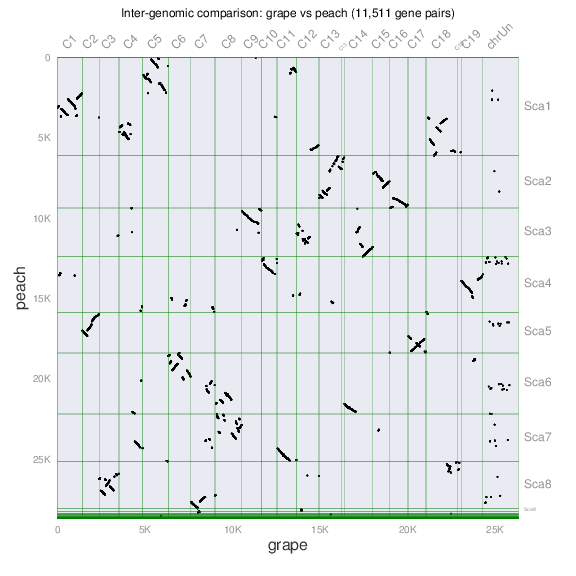

In [14]:
# display `grape.peachORTH.pdf` **ORTHOLOGS SETTING RESULT**
from wand.image import Image as WImage
img = WImage(filename="grape.peachORTH.pdf")
img

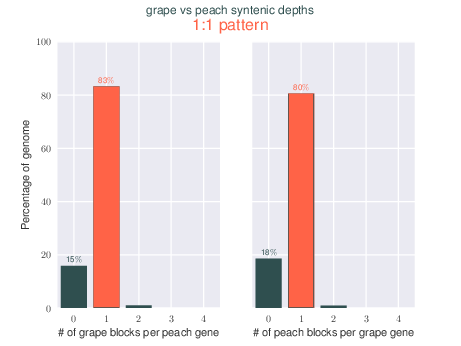

In [15]:
# display `grape.peach.depthORTH.pdf` **ORTHOLOGS SETTING RESULT**
from wand.image import Image as WImage
img = WImage(filename="grape.peach.depthORTH.pdf")
img

### Macrosynteny visualization

In [16]:
# Make seqids content match example code
seqids_string='''chr1,chr2,chr3,chr4,chr5,chr6,chr7,chr8,chr9,chr10,chr11,chr12,chr13,chr14,chr15,chr16,chr17,chr18,chr19
scaffold_1,scaffold_2,scaffold_3,scaffold_4,scaffold_5,scaffold_6,scaffold_7,scaffold_8'''
!echo "{seqids_string}">seqids

In [17]:
#Change layout to match example (see https://matplotlib.org/gallery/color/named_colors.html for colors)
layout_string='''# y, xstart, xend, rotation, color, label, va,  bed
 .6,     .1,    .8,       0,      coral, Grape, top, grape.bed
 .4,     .1,    .8,       0,      plum, Peach, top, peach.bed
# edges
e, 0, 1, grape.peach.anchors.simple'''
!echo "{layout_string}">layout

Leaving the color settings blank/default in the cases where that was how it was shown in the code in the example workflow resulted in inconsistent outcomes, probably because the examples were run at different times and not in order as they are here. Colors have been set to match the examples throughout this notebook to be reproducible. 

In [18]:
# Make `.simple` file
!python2 -m jcvi.compara.synteny screen --minspan=30 --simple grape.peach.anchors grape.peach.anchors.new 

21:40:19 [base] Load file `grape.peach.anchors`
21:40:19 [synteny] Assuming --qbed=grape.bed --sbed=peach.bed
21:40:19 [base] Load file `grape.bed`
21:40:20 [base] Load file `peach.bed`
21:40:20 [base] Load file `grape.peach.anchors.new`
21:40:20 [base] Load file `grape.bed`
21:40:21 [base] Load file `peach.bed`
21:40:21 [synteny] A total of 179 blocks written to `grape.peach.anchors.simple`.
21:40:21 [synteny] Before: 369 blocks, After: 179 blocks


In [19]:
!python2 -m jcvi.graphics.karyotype seqids layout

21:40:23 [__init__] $HOME=/home/jovyan
21:40:23 [__init__] matplotlib data path /srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/mpl-data
21:40:23 [__init__] loaded rc file /srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/mpl-data/matplotlibrc
21:40:23 [__init__] matplotlib version 2.2.2
21:40:23 [__init__] interactive is False
21:40:23 [__init__] platform is linux2


21:40:23 [__init__] loaded modules: ['networkx.drawing.nx_pylab', 'email.MIMEAudio', 'numpy.core.info', 'networkx.algorithms.assortativity.collections', 'Bio.SeqIO.UniprotIO', 'networkx.generators.trees', 'jcvi.apps.base', 'ctypes.os', 'Bio.os', 'networkx.readwrite.multiline_adjlist', 'runpy', 'gc', 'distutils.sysconfig', 'pkg_resources._vendor.traceback', 'jcvi.graphics.chromosome', 'networkx.linalg.laplacianmatrix', 'matplotlib.cbook._backports', 'email.warnings', 'Bio._py3k.urllib2', 'logging.weakref', 'networkx.algorithms.components.strongly_connected', 'jcvi.formats.blast', 'pprint', 'networkx.algorithms.community.scipy', 'email.socket', 'scipy.sparse.linalg.isolve.minres', 'networkx.algorithms.tree.coding', 'matplotlib', 'networkx.readwrite.itertools', 'jcvi.utils', 'jcvi.apps.signal', 'unittest.sys', 'numpy.core.umath', 'networkx.generators.degree_seq', 'email.MIMENonMultipart', 'networkx.algorithms.voronoi', 'networkx.algorithms.tree.mst', 'networkx.algorithms.components.biconn

21:40:23 [__init__] CACHEDIR=/home/jovyan/.cache/matplotlib
21:40:23 [font_manager] Using fontManager instance from /home/jovyan/.cache/matplotlib/fontList.json
21:40:23 [__init__] backend agg version v2.2
21:40:24 [base] Load file `layout`
21:40:24 [base] Load file `grape.bed`
21:40:25 [base] Load file `peach.bed`
21:40:26 [texmanager] serif font is not compatible with usetex.
21:40:26 [texmanager] serif font is not compatible with usetex.
21:40:26 [texmanager] family: serif, font: Computer Modern Roman, info: ('cmr', '')
21:40:26 [texmanager] family: sans-serif, font: Helvetica, info: ('phv', '\\usepackage{helvet}')
21:40:26 [texmanager] cursive font is not compatible with usetex.
21:40:26 [texmanager] cursive font is not compatible with usetex.
21:40:26 [texmanager] family: cursive, font: Zapf Chancery, info: ('pzc', '\\usepackage{chancery}')
21:40:26 [texmanager] monospace font is not compatible with usetex.
21:40:26 [texmanager] monospace font is not compatible with usetex.
21:40:

21:40:27 [dviread] find_tex_file result: /var/lib/texmf/fonts/map/pdftex/updmap/pdftex.map
21:40:27 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
21:40:27 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
21:40:27 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
21:40:27 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
21:40:27 [backend_pdf] Assigning font /F1 = phvr8r (dvi)
21:40:27 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:40:27 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/349983685cc735e1492e5b1ebec5dab8.dvi
21:40:27 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
21:40:27 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:40:27 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:40:27 [texmanager] ['latex', '-interaction=no

21:40:28 [texmanager] This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/jovyan/.cache/matplotlib/tex.cache/28c55607265124db7b3ecf63382df0c1.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/helvet.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdi

21:40:28 [texmanager] This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/jovyan/.cache/matplotlib/tex.cache/e071f5f23437e665a84006648786ae70.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/helvet.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdi

21:40:29 [texmanager] This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/jovyan/.cache/matplotlib/tex.cache/6e0a75fbbd57688e16d7507cbe5ad959.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/helvet.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdi

21:40:29 [texmanager] This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/jovyan/.cache/matplotlib/tex.cache/91a3269948a6d840dd238bf65572097d.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/helvet.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdi

21:40:30 [texmanager] This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/jovyan/.cache/matplotlib/tex.cache/b6e1395f9713468af88c38e77283fc1f.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/helvet.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdi

21:40:30 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
21:40:30 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:40:30 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/d2acc2706db635f7f7afe7dc80ac47f1.dvi
21:40:30 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
21:40:30 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:40:30 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:40:30 [texmanager] ['latex', '-interaction=nonstopmode', '--halt-on-error', '/home/jovyan/.cache/matplotlib/tex.cache/4b647665e15f33a202cd68146e5d4d3a.tex']
21:40:30 [texmanager] This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/jovyan/.cache/matplotlib/tex.cache/4b647665e15f33a202cd68146e5d4d3a.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenati

21:40:30 [backend_pdf] Embedding TeX font phvr8r - fontinfo={'fontfile': u'/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb', 'pdfname': <Name F1>, 'encodingfile': u'/usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc', 'dvifont': <matplotlib.dviread.DviFont object at 0x7f69904850b0>, 'basefont': 'NimbusSanL-Regu', 'effects': {}}
21:40:30 [dviread] Parsing TeX encoding /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
21:40:30 [dviread] Result: ['.notdef', 'dotaccent', 'fi', 'fl/fraction', 'hungarumlaut', 'Lslash', 'lslash/ogonek', 'ring', '.notdef', 'breve/minus', '.notdef', 'Zcaron', 'zcaron/caron', 'dotlessi', 'dotlessj', 'ff/ffi', 'ffl', 'notequal', 'infinity/lessequal', 'greaterequal', 'partialdiff', 'summation/product', 'pi', 'grave', 'quotesingle/space', 'exclam', 'quotedbl', 'numbersign/dollar', 'percent', 'ampersand', 'quoteright/parenleft', 'parenright', 'asterisk', 'plus/comma', 'hyphen', 'period', 'slash/zero', 'one', 'two', 'three/four', 'fiv

21:40:31 [texmanager] This is dvipng 1.15 Copyright 2002-2015 Jan-Ake Larsson
[1] 

21:40:31 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:40:31 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/bd074d6e540d81593bbab8e6c2367132.dvi
21:40:31 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
21:40:31 [font_manager] findfont: Matching :family=DejaVu Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans (u'/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
21:40:31 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:40:31 [dviread] Dvi: /home/jovyan/.cache/matplotli

21:40:31 [texmanager] This is dvipng 1.15 Copyright 2002-2015 Jan-Ake Larsson
[1] 

21:40:31 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:40:31 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/d964bc4d2788c7adde9ac440f37443e0.dvi
21:40:31 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
21:40:31 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:40:31 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/e071f5f23437e665a84006648786ae70.dvi
21:40:31 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
21:40:31 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:40:31 [texmanager] fontconfig: sans-serif

/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
21:40:32 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:40:32 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/061eb7581678ad6ad393e68a2abd2869.dvi
21:40:32 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
21:40:32 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:40:32 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:40:32 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:40:32 [texmanager] ['dvipng', '-bg', 'Transparent', '-D', '100.0', '-T', 'tight', '-o', '/home/jovyan/.cache/matplotlib/tex.cache/e3ac893c8ba87119d4ab4c12864e0b73.png', '/home/jovyan/.cache/matplotlib/tex.cache/061eb7581678

21:40:33 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:40:33 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/c52e49c87a08ee0903b4f19f0c3a7def.dvi
21:40:33 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
21:40:33 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:40:33 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:40:33 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:40:33 [texmanager] ['dvipng', '-bg', 'Transparent', '-D', '100.0', '-T', 'tight', '-o', '/home/jovyan/.cache/matplotlib/tex.cache/2f8ebc81ce830a57ddc1b9ea73379589.png', '/home/jovyan/.cache/matplotlib/tex.cache/c52e49c87a08ee0903b4f19f0c3a7def.dvi']
21:40:33 [texmanager] This is dvipng 1.15 Copyright 2002-2015 Jan-Ake Larsson
[1] 

21:40:33 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:40:33 [dviread] Dvi: /

21:40:33 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:40:33 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/660e75d47eab547b28012734ed38c7f5.dvi
21:40:33 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
21:40:33 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:40:33 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:40:33 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/660e75d47eab547b28012734ed38c7f5.dvi
21:40:33 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
21:40:33 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:40:33 [dviread] Dvi: /home/jovyan/.

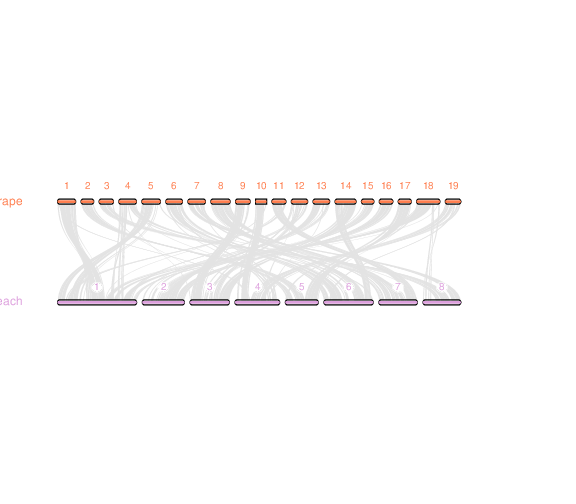

In [20]:
# display karyotype.pdf (rename it too so retained during next steps)
!mv karyotype.pdf karyotypeDEFAULT.pdf
from wand.image import Image as WImage
img = WImage(filename="karyotypeDEFAULT.pdf")
img

**Add highlight.**

In [21]:
# Not mentioned but clearly layout was edited to get different colors
layout_string='''# y, xstart, xend, rotation, color, label, va,  bed
 .6,     .1,    .8,       0,      gold, Grape, top, grape.bed
 .4,     .1,    .8,       0,      yellowgreen, Peach, top, peach.bed
# edges
e, 0, 1, grape.peach.anchors.simple'''
!echo "{layout_string}">layout

In [22]:
# Add `g*` to start of first line of grape.peach.anchors.simple 
!sed -i '1 s/^/g\*/' grape.peach.anchors.simple 
#see https://stackoverflow.com/a/12318347/8508004 &
# https://superuser.com/a/246841 for sed command to prepend inplace on same line and not above first line

In [23]:
!python2 -m jcvi.graphics.karyotype seqids layout

21:40:39 [__init__] $HOME=/home/jovyan
21:40:39 [__init__] matplotlib data path /srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/mpl-data
21:40:39 [__init__] loaded rc file /srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/mpl-data/matplotlibrc
21:40:39 [__init__] matplotlib version 2.2.2
21:40:39 [__init__] interactive is False
21:40:39 [__init__] platform is linux2
21:40:39 [__init__] loaded modules: ['networkx.drawing.nx_pylab', 'email.MIMEAudio', 'numpy.core.info', 'networkx.algorithms.assortativity.collections', 'Bio.SeqIO.UniprotIO', 'networkx.generators.trees', 'jcvi.apps.base', 'ctypes.os', 'Bio.os', 'networkx.readwrite.multiline_adjlist', 'runpy', 'gc', 'distutils.sysconfig', 'pkg_resources._vendor.traceback', 'jcvi.graphics.chromosome', 'networkx.linalg.laplacianmatrix', 'matplotlib.cbook._backports', 'email.warnings', 'Bio._py3k.urllib2', 'logging.weakref', 'networkx.algorithms.components.strongly_connected', 'jcvi.formats.blast', 'pprint', 'networkx

21:40:39 [__init__] CACHEDIR=/home/jovyan/.cache/matplotlib
21:40:39 [font_manager] Using fontManager instance from /home/jovyan/.cache/matplotlib/fontList.json
21:40:39 [__init__] backend agg version v2.2
21:40:39 [base] Load file `layout`
21:40:39 [base] Load file `grape.bed`
21:40:40 [base] Load file `peach.bed`
21:40:41 [texmanager] serif font is not compatible with usetex.
21:40:41 [texmanager] serif font is not compatible with usetex.
21:40:41 [texmanager] family: serif, font: Computer Modern Roman, info: ('cmr', '')
21:40:41 [texmanager] family: sans-serif, font: Helvetica, info: ('phv', '\\usepackage{helvet}')
21:40:41 [texmanager] cursive font is not compatible with usetex.
21:40:41 [texmanager] cursive font is not compatible with usetex.
21:40:41 [texmanager] family: cursive, font: Zapf Chancery, info: ('pzc', '\\usepackage{chancery}')
21:40:41 [texmanager] monospace font is not compatible with usetex.
21:40:41 [texmanager] monospace font is not compatible with usetex.
21:40:

21:40:43 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
21:40:43 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:40:43 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/d2acc2706db635f7f7afe7dc80ac47f1.dvi
21:40:43 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
21:40:43 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:40:43 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/126f6d0ea8ce67416c1189ca82f75f83.dvi
21:40:43 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
21:40:43 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:40:43 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/126f6d0ea8ce67416c1189ca82f75f83.dvi
21:40:43 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
21:40:43 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e980099

21:40:43 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/916c6639f11b2f601035ad5d50405405.dvi
21:40:43 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
21:40:43 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:40:43 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/916c6639f11b2f601035ad5d50405405.dvi
21:40:43 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
21:40:43 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:40:43 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/d2acc2706db635f7f7afe7dc80ac47f1.dvi
21:40:43 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
21:40:43 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:40:43 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/28c55607265124db7b3ecf63382df0c1.dvi
21:40:43 [dviread] Dvi._xxx: encountered special: papersize=5203

/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
21:40:43 [font_manager] findfont: Matching :family=DejaVu Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to DejaVu Sans (u'/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
21:40:43 [texmanager] serif font is not compatible with usetex.
21:40:43 [texmanager] serif font is not compatible with usetex.
21:40:43 [texmanager] family: serif, font: Computer Modern Roman, info: ('cmr', '')
21:40:43 [texmanager] family: sans-serif, font: Helvetica, info: ('phv', '\\usepackage{helvet}')
21:40:43 [texmanager] cursive font is not compatible with usetex.
21:40:43 [texmanager] cursive font is not compatible with usetex.
21:40:43 [texmanager] family: cursive, font: Zapf Chancery, info

/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
21:40:43 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:40:43 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/d964bc4d2788c7adde9ac440f37443e0.dvi
21:40:43 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
21:40:43 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:40:43 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:40:43 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:40:43 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/d964bc4d2788c7adde9ac440f37443e0.dvi
21:40:43 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/s

/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
21:40:43 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:40:43 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/c52e49c87a08ee0903b4f19f0c3a7def.dvi
21:40:43 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
21:40:43 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:40:43 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:40:43 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:40:43 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/c52e49c87a08ee0903b4f19f0c3a7def.dvi
21:40:43 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/s

/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
21:40:43 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:40:43 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/d964bc4d2788c7adde9ac440f37443e0.dvi
21:40:43 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
21:40:43 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:40:43 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
21:40:43 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/d964bc4d2788c7adde9ac440f37443e0.dvi
21:40:43 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-s

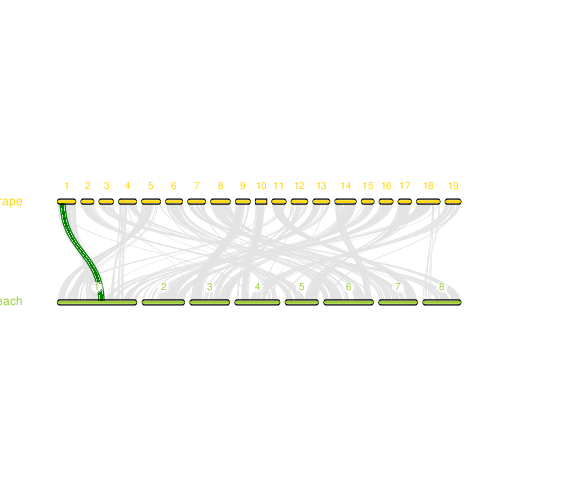

In [24]:
# display karyotype.pdf (rename it too so clear it is the second one)
!mv karyotype.pdf karyotypeHIGHLIGHT.pdf
from wand.image import Image as WImage
img = WImage(filename="karyotypeHIGHLIGHT.pdf")
img

### Macrosynteny getting fancy

This section will continue to work through the corresponding section in [the example workflow][1].

As with data above, the `Tcacao` data has been included already in this running Binder session for this section.

[1]: https://github.com/tanghaibao/jcvi/wiki/MCscan-(Python-version)

In [ ]:
!python2 -m jcvi.formats.fasta format --sep="|" Tcacao_233_cds.fa.gz cacao.cds
!python2 -m jcvi.formats.gff bed --type=mRNA --key=Name Tcacao_233_gene.gff3.gz -o cacao.bed
!python2 -m jcvi.compara.catalog ortholog peach cacao --cscore=.99
!python2 -m jcvi.compara.synteny screen --minspan=30 --simple peach.cacao.anchors peach.cacao.anchors.new

21:40:50 [base] Load file `Tcacao_233_gene.gff3.gz`


In [ ]:
#Change layout to match example (see https://matplotlib.org/gallery/color/named_colors.html for colors)
layout_string='''# y, xstart, xend, rotation, color, label, va,  bed
 .7,     .1,    .8,      15,      violet, Grape, top, grape.bed
 .5,     .1,    .8,       0,      steelblue, Peach, top, peach.bed
 .3,     .1,    .8,     -15,      silver, Cacao, bottom, cacao.bed
# edges
e, 0, 1, grape.peach.anchors.simple
e, 1, 2, peach.cacao.anchors.simple'''
!echo "{layout_string}">layout

In [ ]:
#Change seqids to match example
seqids_string='''chr1,chr2,chr3,chr4,chr5,chr6,chr7,chr8,chr9,chr10,chr11,chr12,chr13,chr14,chr15,chr16,chr17,chr18,chr19
scaffold_1,scaffold_2,scaffold_3,scaffold_4,scaffold_5,scaffold_6,scaffold_7,scaffold_8
scaffold_1,scaffold_2,scaffold_3,scaffold_4,scaffold_5,scaffold_6,scaffold_7,scaffold_8,scaffold_9,scaffold_10r'''
!echo "{seqids_string}">seqids

In [ ]:
!python2 -m jcvi.graphics.karyotype seqids layout

In [ ]:
# display karyotype.pdf (rename it too so clear it is the three genome one)
!mv karyotype.pdf karyotypeTHREE.pdf
from wand.image import Image as WImage
img = WImage(filename="karyotypeTHREE.pdf")
img

### Microsynteny visualization

This section will continue to work through the corresponding section in [the example workflow][1].

[1]: https://github.com/tanghaibao/jcvi/wiki/MCscan-(Python-version)

In [ ]:
!python2 -m jcvi.compara.synteny mcscan grape.bed grape.peach.lifted.anchors --iter=1 -o grape.peach.i1.blocks

In [ ]:
!head -50 grape.peach.i1.blocks > blocks

In [ ]:
#Make blocks.layout to match example
blocks_layout_string='''# x,   y, rotation,   ha,     va,   color, ratio,            label
0.5, 0.6,        0, left, center,       m,     1,       grape Chr1
0.5, 0.4,        0, left, center, #fc8d62,     1, peach scaffold_1
# edges
e, 0, 1'''
!echo "{blocks_layout_string}">blocks.layout

In [ ]:
!cat grape.bed peach.bed > grape_peach.bed
!python2 -m jcvi.graphics.synteny blocks grape_peach.bed blocks.layout

In [ ]:
# display blocks.pdf (rename it too so it remains when next section run)
!mv blocks.pdf blocksVIS.pdf
from wand.image import Image as WImage
img = WImage(filename="blocksVIS.pdf")
img

### Microsynteny getting fancy

This section will continue to work through the corresponding section in [the example workflow][1].

[1]: https://github.com/tanghaibao/jcvi/wiki/MCscan-(Python-version)

In [ ]:
!python2 -m jcvi.compara.catalog ortholog grape cacao --cscore=.99
!python2 -m jcvi.compara.synteny mcscan grape.bed grape.cacao.lifted.anchors --iter=1 -o grape.cacao.i1.blocks

In [ ]:
!python2 -m jcvi.formats.base join grape.peach.i1.blocks grape.cacao.i1.blocks --noheader | cut -f1,2,4,6 > grape.blocks
!head -50 grape.blocks > blocks2

In [ ]:
#Make blocks2.layout to match example
blocks2_layout_string='''# x,   y, rotation,     ha,     va, color, ratio,            label
0.5, 0.6,        0, center,    top,      ,     1,       grape Chr1
0.3, 0.4,        0, center, bottom,      ,    .5, peach scaffold_1
0.7, 0.4,        0, center, bottom,      ,    .5, cacao scaffold_2
# edges
e, 0, 1
e, 0, 2'''
!echo "{blocks2_layout_string}">blocks2.layout

In [ ]:
!cat grape.bed peach.bed cacao.bed > grape_peach_cacao.bed
!python2 -m jcvi.graphics.synteny blocks2 grape_peach_cacao.bed blocks2.layout

In [ ]:
# display blocks2.pdf 
from wand.image import Image as WImage
img = WImage(filename="blocks2.pdf")
img

## Where to next?

Hopefully, the above examples have demonstrated you now have an environment that you can run MCScan and generate some useful results. Your next step would be to add your data and repeat. You can get to the Jupyter Dashboard by clicking the the Jupyter logo in the upper left corner of this notebook. There you can upload files from your computer using a typical GUI file handling interface. Or, you can use the command line to retrieve files.

Note that you can also use that same Jupyter Dashboard, to launch new notebooks to start working with your own data in a fresh notebook in the same session as you ran the examples above.

Remember that if you make any useful files to get them ASAP as these Binder-associated instances are temporary.